In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show_image(image, title=None, vmin=0, vmax=255):
    plt.imshow(image, cmap='gray', vmin=vmin, vmax=vmax)
    plt.axis('off')
    plt.title(title) 

### Global Threshold

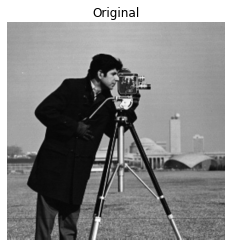

In [20]:
img_gray = plt.imread('img_grayscale.jpg')
show_image(img_gray, 'Original')

In [45]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Obtain the optimal threshold value
thresh = threshold_otsu(img_gray)

# Apply thresholding to the image
img_bw = img_gray > thresh

87


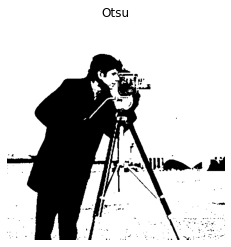

In [46]:
print(thresh)
show_image(img_bw, 'Otsu', vmin=0, vmax=1)

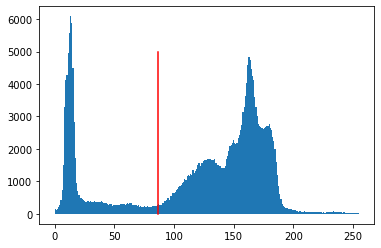

In [47]:
plt.hist(img_gray.ravel(), bins=256);
plt.plot((thresh,thresh), (-5,5000), color='r');

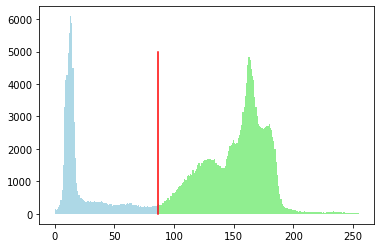

In [55]:
n, bins, patches = plt.hist(img_gray.ravel(), 256);

for c, p in zip(bins, patches):
    if c >= 0 and c < thresh:
        plt.setp(p, 'facecolor', 'lightblue');
    else:
        plt.setp(p, 'facecolor', 'lightgreen');
        
plt.plot((thresh,thresh), (-5,5000), color='r');
plt.show();

### Global (Histogram-based) / Local (Adaptive) threshold

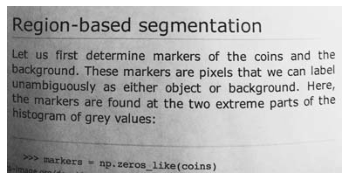

In [32]:
from skimage import data
img_page = data.page()
show_image(img_page)

**Global thresholding**

In [33]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Obtain the optimal threshold value
thresh = threshold_otsu(img_page)

# Apply thresholding to the image
img_bw_global = img_page > thresh

157


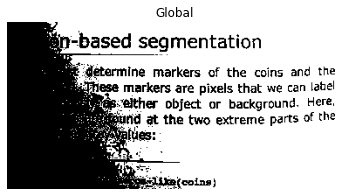

In [34]:
print(thresh)
show_image(img_bw_global, 'Global', vmin=0, vmax=1)

**Local thresholding**

In [39]:
# Import the local threshold function
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 31


# Obtain the optimal local thresholding
local_thresh = threshold_local(img_page, block_size, offset=10)

# Apply thresholding to the image
img_bw_local = img_page > local_thresh

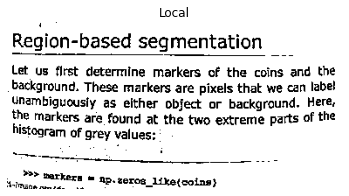

In [40]:
show_image(img_bw_local, 'Local', vmin=0, vmax=1)

### Edge Detection

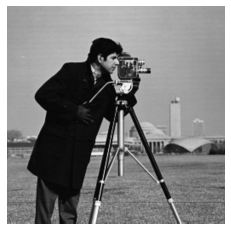

In [59]:
img_gray = plt.imread("img_grayscale.jpg")
show_image(img_gray)

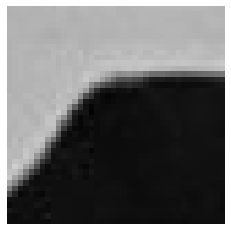

In [106]:
show_image(img_gray[120:160, 120:160])

(-0.5, 511.5, 511.5, -0.5)

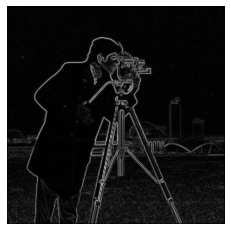

In [116]:
#try sobel
from skimage.filters import sobel
img_sobel = sobel(img_gray) 
plt.imshow(img_sobel, cmap='gray')
plt.axis('off')

0.0

0.6071358946870583

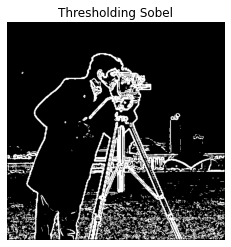

In [119]:
show_image(img_sobel > img_sobel.max()*0.1, 'Thresholding Sobel', vmin=0, vmax=1)
# img_sobel[120:160, 120:160]
img_sobel.min()
img_sobel.max()

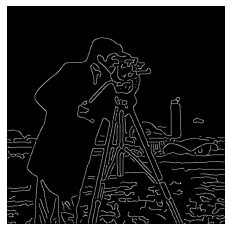

In [89]:
#try canny
from skimage.feature import canny 

img_canny = canny(img_gray, sigma=3, low_threshold=10, high_threshold=20) #, low_threshold=25.5, high_threshold=51)

show_image(img_canny, vmin=0, vmax=1) 

### Count coins

In [ ]:
from skimage import data
img_coins = data.coins()
img_coins.shape
img_coins.dtype
show_image(img_coins)

In [ ]:
h = plt.hist(img_coins.ravel(), bins=256, range=(-0.1,255.5))  

In [ ]:
#try simple threshold 
show_image(img_coins > 80, "at 80")
show_image(img_coins > 100, "at 100")
show_image(img_coins > 130, "at 130")

In [ ]:
#try all threshold
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(img_coins, figsize=(15,10), verbose=False)

In [ ]:
#try adaptive threshold
from skimage.filters import threshold_otsu

thresh = threshold_otsu(img_coins)
img_otsu = img_coins > thresh
show_image(img_otsu)

In [ ]:
#try local threshold
from skimage.filters import threshold_local

block_size = 31
local_thresh = threshold_local(img_coins, block_size, offset=10)
img_local = img_coins > local_thresh
show_image(img_local)

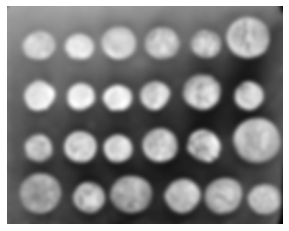

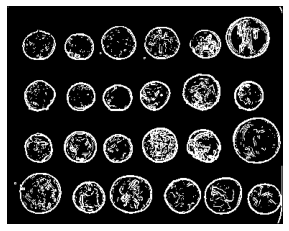

In [74]:
#try sobel
from skimage.filters import sobel, gaussian
img_gaussian = gaussian(img_coins, sigma=3)
img_sobel = sobel(img_coins)
show_image(img_gaussian)
show_image(img_sobel > 0.1)

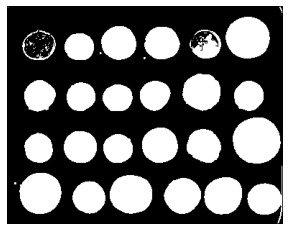

In [76]:
from scipy import ndimage as ndi
img_output = ndi.binary_fill_holes(img_sobel > 0.1)
show_image(img_output)

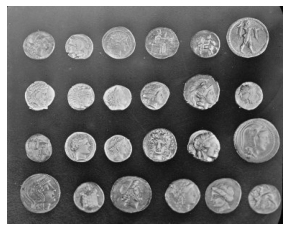

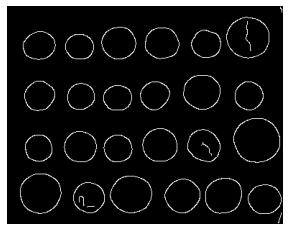

4018

In [57]:
#try canny
from skimage.feature import canny
from skimage import data
img_coins = data.coins()

img_canny = canny(img_coins, sigma=3, low_threshold=25.5, high_threshold=51)

show_image(img_coins)
show_image(img_canny)
img_canny.sum()

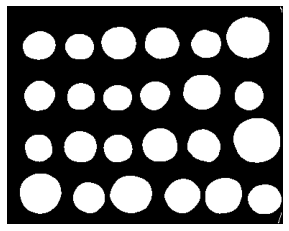

In [58]:
from scipy import ndimage as ndi
img_output = ndi.binary_fill_holes(img_canny)
show_image(img_output)

In [61]:
from skimage.measure import label
img_label, N = label(img_output, return_num=True)
N

26